In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA4'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
# Data handling and manipulation
import pandas as pd
import numpy as np

# Implementing and selecting models
import statsmodels.api as sm
from itertools import combinations
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# For advanced visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Show computation time
import time

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "white", palette = "colorblind")

In [3]:
from skimpy import clean_columns

pollution = pd.read_csv("data/merged_pollution.csv", encoding = 'iso-8859-1')
pollution = clean_columns(pollution)

pollution.head()

,entity,year,access_clean_perc,gdp,popn,death_rate_asp
0,0,2000.0,-1.371886,0.000000,-0.104197,371.951345
1,0,2001.0,-1.353313,0.000000,-0.102565,368.490253
2,0,2002.0,-1.330292,-0.877632,-0.100603,355.870851
3,0,2003.0,-1.302300,-0.875238,-0.098471,350.188748
4,0,2004.0,-1.276925,-0.877087,-0.096407,341.858106


In [4]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entity             3264 non-null   int64  
 1   year               3264 non-null   float64
 2   access_clean_perc  3264 non-null   float64
 3   gdp                3264 non-null   float64
 4   popn               3264 non-null   float64
 5   death_rate_asp     3264 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 153.1 KB


In [5]:
pollution.describe()

,entity,year,access_clean_perc,gdp,popn,death_rate_asp
count,3264.000000,3264.00000,3.264000e+03,3.264000e+03,3.264000e+03,3264.000000
mean,95.500000,2008.00000,-1.349683e-16,8.707632e-18,4.353816e-17,70.587846
std,55.433366,4.89973,1.000153e+00,1.000153e+00,1.000153e+00,87.057969
min,0.000000,2000.00000,-1.598171e+00,-9.067143e-01,-1.451953e-01,0.005738
25%,47.750000,2004.00000,-1.064244e+00,-7.425174e-01,-1.417803e-01,1.090309
50%,95.500000,2008.00000,4.424448e-01,-3.377230e-01,-1.295730e-01,23.828597
75%,143.250000,2012.00000,9.444564e-01,3.119429e-01,-9.508658e-02,135.902705
max,191.000000,2016.00000,1.013911e+00,5.036683e+00,1.458832e+01,474.973060


In [6]:
pollution.isnull().sum()

entity               0
year                 0
access_clean_perc    0
gdp                  0
popn                 0
death_rate_asp       0
dtype: int64

In [7]:
#| code-fold: true
# Assuming pollution DataFrame is predefined
X = pollution[['year', 'access_clean_perc', 'gdp', 'popn']]
y = pollution['death_rate_asp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Adding a constant for OLS
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fitting the OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Making predictions
y_pred = model.predict(X_test_with_const)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Extracting Adjusted R-squared from the model's summary
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 1526.64
R-squared: 0.8002


In [8]:
VIFs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for idx, vif in enumerate(VIFs):
    print(f"VIF for column {X.columns[idx]}: {round(vif, 3)}")

VIF for column year: 1.0
VIF for column access_clean_perc: 1.678
VIF for column gdp: 1.679
VIF for column popn: 1.001


In [9]:
#| code-fold: true
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Add a constant to the model (for statsmodels)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha = 1)  # Alpha is the regularization strength; adjust accordingly

# Fit the model
ridge_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = ridge_reg.predict(X_test)

# Calculate and print the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse, 2)}\n')

# Since Ridge doesn't provide AIC, BIC directly, we focus on what's available
print(f'R-squared: {round(r2, 2)}')

Mean Squared Error: 1526.71

R-squared: 0.8


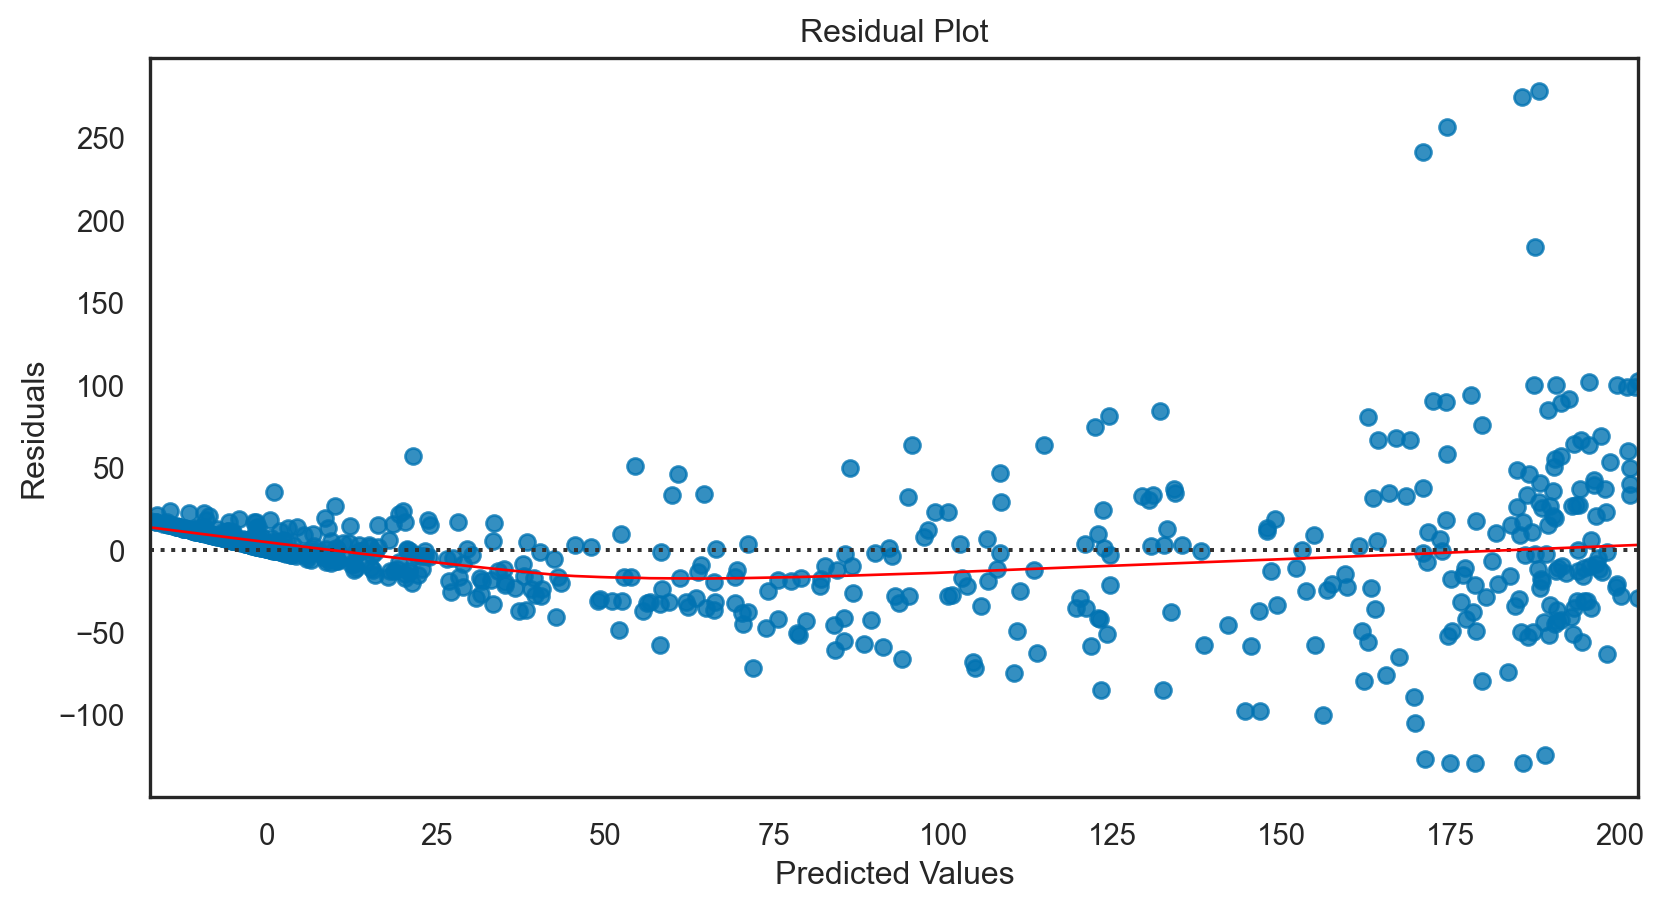

In [10]:
#| code-fold: true
residuals = y_test - y_pred
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [11]:
# Define a set of alpha values
alphas = np.logspace(-6, 6, 13)

# Initialize RidgeCV
ridge_cv = RidgeCV(alphas = alphas, store_cv_results = True)

# Fit the model
ridge_cv.fit(X_train, y_train)

# Best alpha value
print(f'Best alpha: {ridge_cv.alpha_}')

# Re-initialize and fit the model with the best alpha
best_ridge = Ridge(alpha = ridge_cv.alpha_)
best_ridge.fit(X_train, y_train)

# Make new predictions
y_pred_best = best_ridge.predict(X_test)

Best alpha: 0.1


In [12]:
# Calculate R-squared
r2_best = r2_score(y_test, y_pred_best)
print(f'R-squared with best alpha: {round(r2_best, 4)}')

# Calculate Mean Squared Error (MSE)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with best alpha: {round(mse_best, 3)}')

R-squared with best alpha: 0.8002
Mean Squared Error with best alpha: 1526.646


In [13]:
# Assuming `y_pred` are the predictions from the initial Ridge model
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)

# Print comparison
print(f'Initial MSE: {round(mse_initial, 3)}, Best Alpha MSE: {round(mse_best, 3)}')
print(f'Initial R-squared: {round(r2_initial, 4)}, Best Alpha R-squared: {round(r2_best, 5)}')

Initial MSE: 1526.708, Best Alpha MSE: 1526.646
Initial R-squared: 0.8002, Best Alpha R-squared: 0.80022


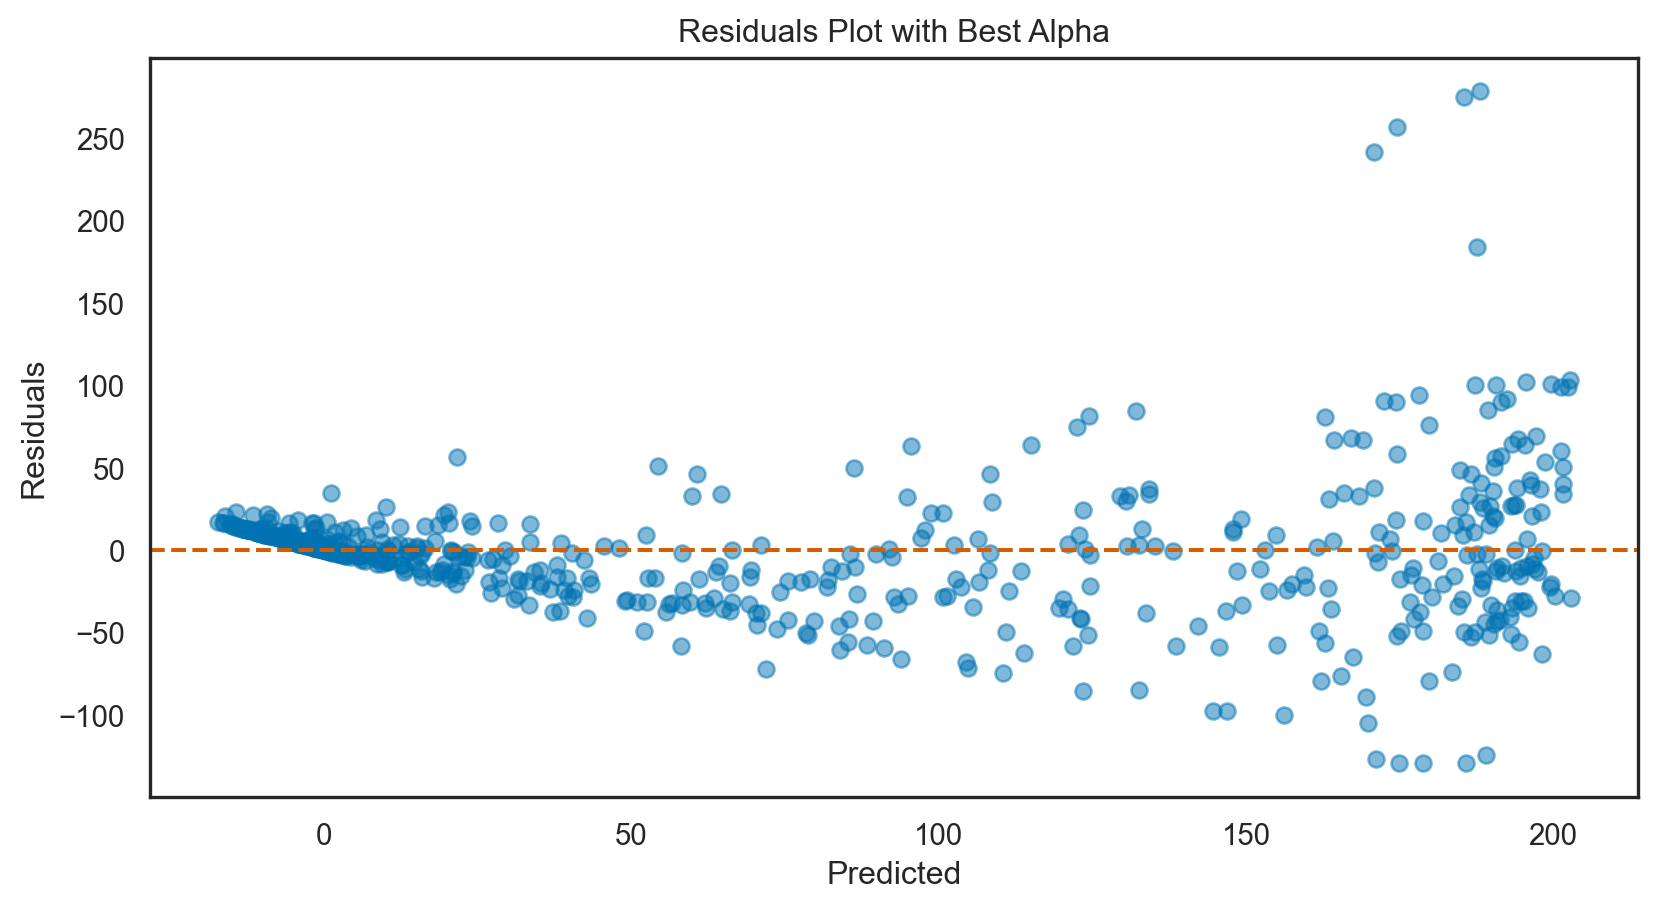

In [14]:
#| code-fold: true
residuals_best = y_test - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot with Best Alpha')
plt.show()

In [15]:
#| code-fold: true
# Prepare the data (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Lasso Regression model
lasso_reg = Lasso(alpha = 1.0)  # Alpha is the regularization strength; adjust accordingly

# Fit the model
lasso_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = lasso_reg.predict(X_test)

# Calculate and print the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse, 2)}')

# Since Lasso doesn't provide AIC, BIC directly, we focus on what's available
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2, 2)}')

Mean Squared Error: 1535.4
R-squared: 0.8


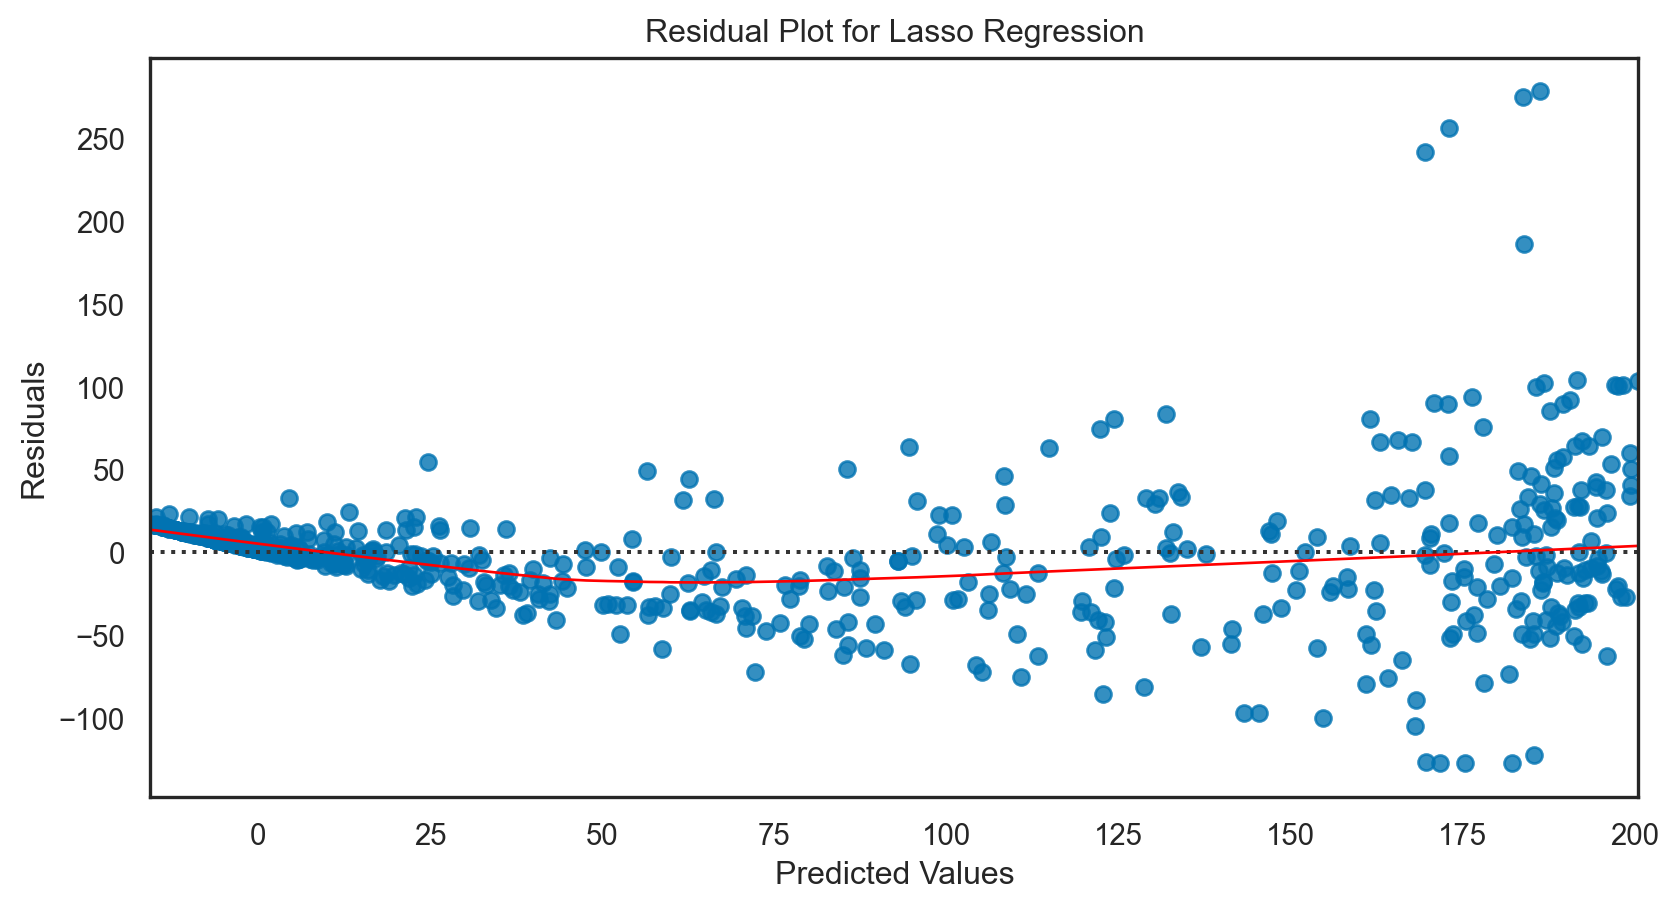

In [16]:
#| code-fold: true
residuals = y_test - y_pred
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Lasso Regression')
plt.show()

In [17]:
# Define a range of alpha values for Lasso
alphas = np.logspace(-6, 6, 13)

# Initialize LassoCV
lasso_cv = LassoCV(alphas = alphas, cv = 5, random_state = 42)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Optimal alpha value
print(f'Optimal alpha: {lasso_cv.alpha_}')

# Re-initialize and fit the model with the optimal alpha
best_lasso = Lasso(alpha = lasso_cv.alpha_)
best_lasso.fit(X_train, y_train)

# Make new predictions
y_pred_best = best_lasso.predict(X_test)

Optimal alpha: 1e-06


In [18]:
# Calculate R-squared with the best alpha
r2_best = r2_score(y_test, y_pred_best)
print(f'R-squared with optimal alpha: {round(r2_best, 4)}')

# Calculate Mean Squared Error (MSE) with the best alpha
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with optimal alpha: {round(mse_best, 3)}')

R-squared with optimal alpha: 0.8002
Mean Squared Error with optimal alpha: 1526.64


In [19]:
# Assuming `y_pred` are the predictions from the initial Lasso model
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)

# Print comparison
print(f'Initial MSE: {round(mse_initial, 3)}, Optimal Alpha MSE: {round(mse_best, 3)}')
print(f'Initial R-squared: {round(r2_initial, 4)}, Optimal Alpha R-squared: {round(r2_best, 4)}')

Initial MSE: 1535.4, Optimal Alpha MSE: 1526.64
Initial R-squared: 0.7991, Optimal Alpha R-squared: 0.8002


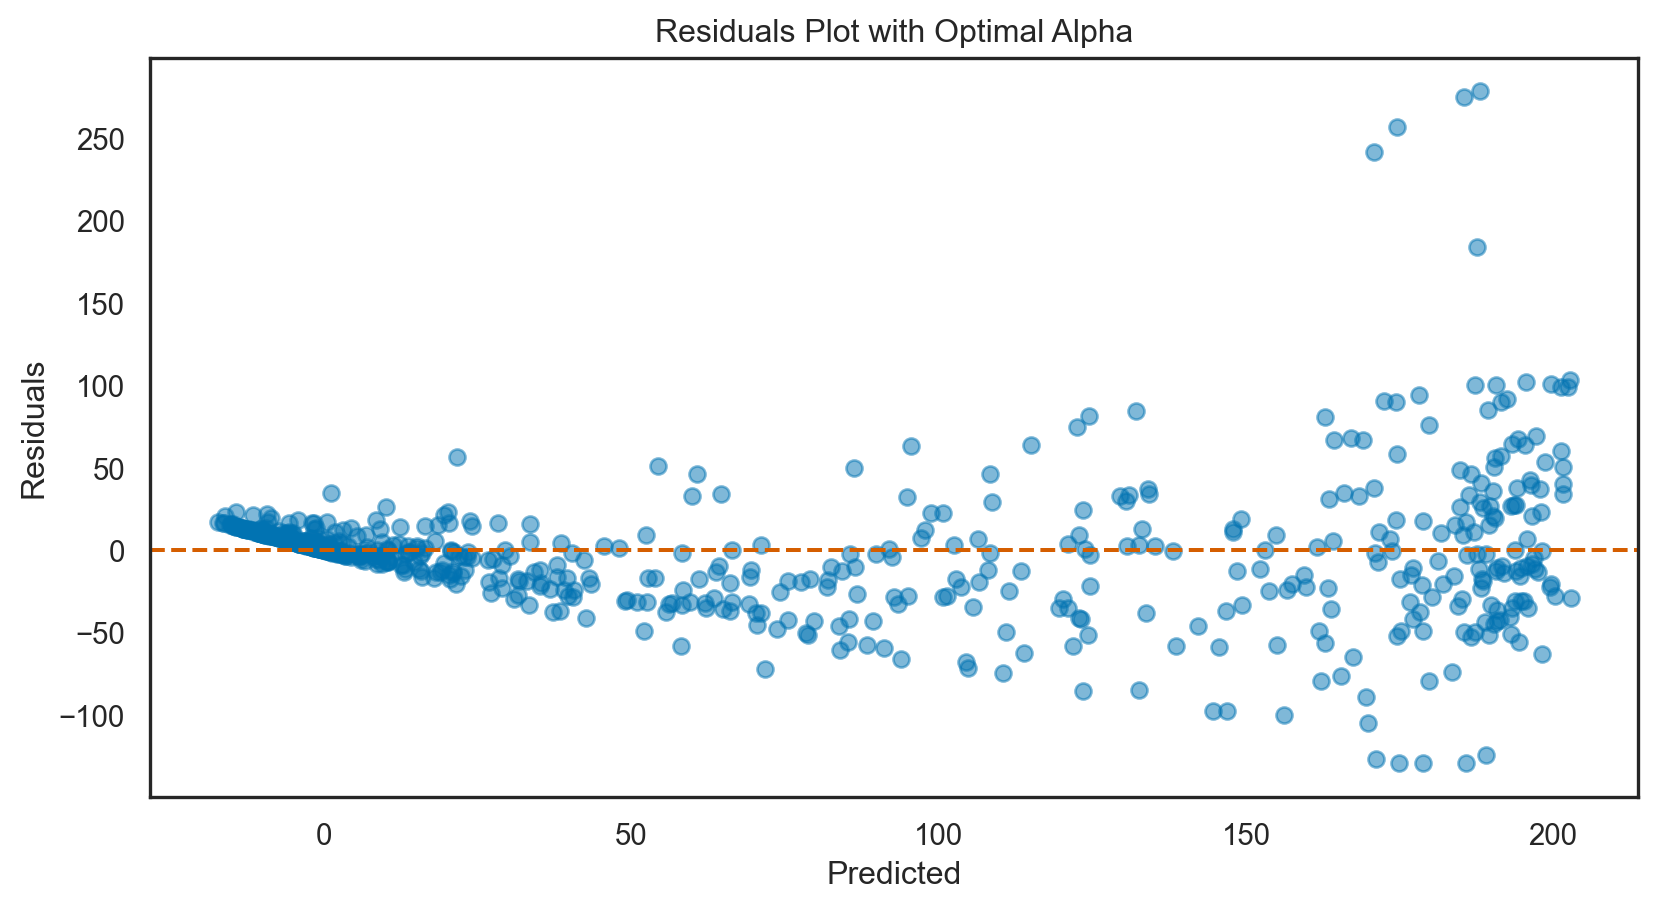

In [20]:
#| code-fold: true
residuals_best = y_test - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot with Optimal Alpha')
plt.show()

In [21]:
#| code-fold: true
# Assuming X and y are already defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Elastic Net Regression model with a mix of L1 and L2 regularization
elastic_net = ElasticNet(alpha = 1.0, l1_ratio = 0.5)  # Adjust alpha and l1_ratio accordingly

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict on the testing set
y_pred = elastic_net.predict(X_test)

# Calculate and print the MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R-squared: {round(r2, 2)}')

Mean Squared Error: 2258.21
R-squared: 0.7


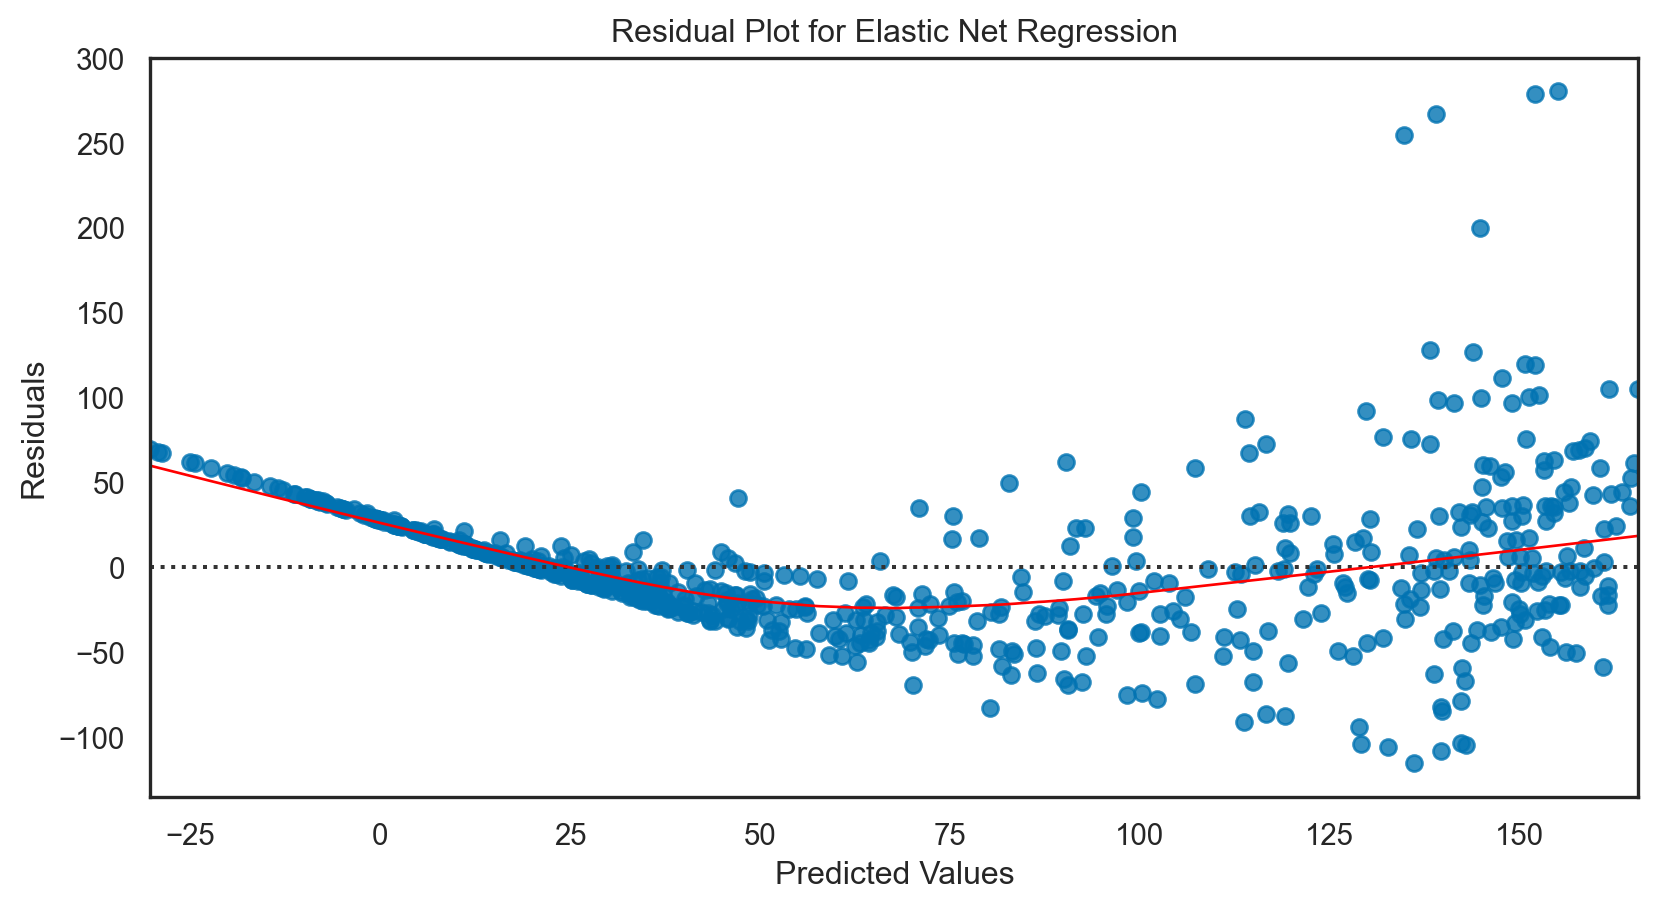

In [22]:
#| code-fold: true
residuals = y_test - y_pred
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Elastic Net Regression')
plt.show()

In [23]:
# Define a range of alpha values and l1_ratios for Elastic Net
alphas = np.logspace(-6, 6, 13)
l1_ratios = np.linspace(0.1, 0.9, 9)

# Initialize ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas = alphas, l1_ratio = l1_ratios, cv = 5, random_state = 42)

# Fit the model to find the optimal alpha and l1_ratio
elastic_net_cv.fit(X_train, y_train)

# Optimal alpha and l1_ratio
print(f'Optimal alpha: {elastic_net_cv.alpha_}')
print(f'Optimal l1_ratio: {elastic_net_cv.l1_ratio_}')

# Re-initialize and fit the model with the optimal parameters
best_elastic_net = ElasticNet(alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_)
best_elastic_net.fit(X_train, y_train)

# Make new predictions
y_pred_best = best_elastic_net.predict(X_test)

Optimal alpha: 0.0001
Optimal l1_ratio: 0.1


In [24]:
# Calculate R-squared with the best parameters
r2_best = r2_score(y_test, y_pred_best)
print(f'R-squared with optimal parameters: {round(r2_best, 4)}')

# Calculate Mean Squared Error (MSE) with the best parameters
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with optimal parameters: {round(mse_best, 3)}')

R-squared with optimal parameters: 0.8002
Mean Squared Error with optimal parameters: 1526.655


In [25]:
# Print comparison of MSE and R-squared before and after tuning
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)
print(f'Initial MSE: {round(mse_initial, 3)}, Optimal Parameters MSE: {round(mse_best, 3)}')
print(f'Initial R-squared: {round(r2_initial, 4)}, Optimal Parameters R-squared: {round(r2_best, 4)}')

Initial MSE: 2258.214, Optimal Parameters MSE: 1526.655
Initial R-squared: 0.7045, Optimal Parameters R-squared: 0.8002


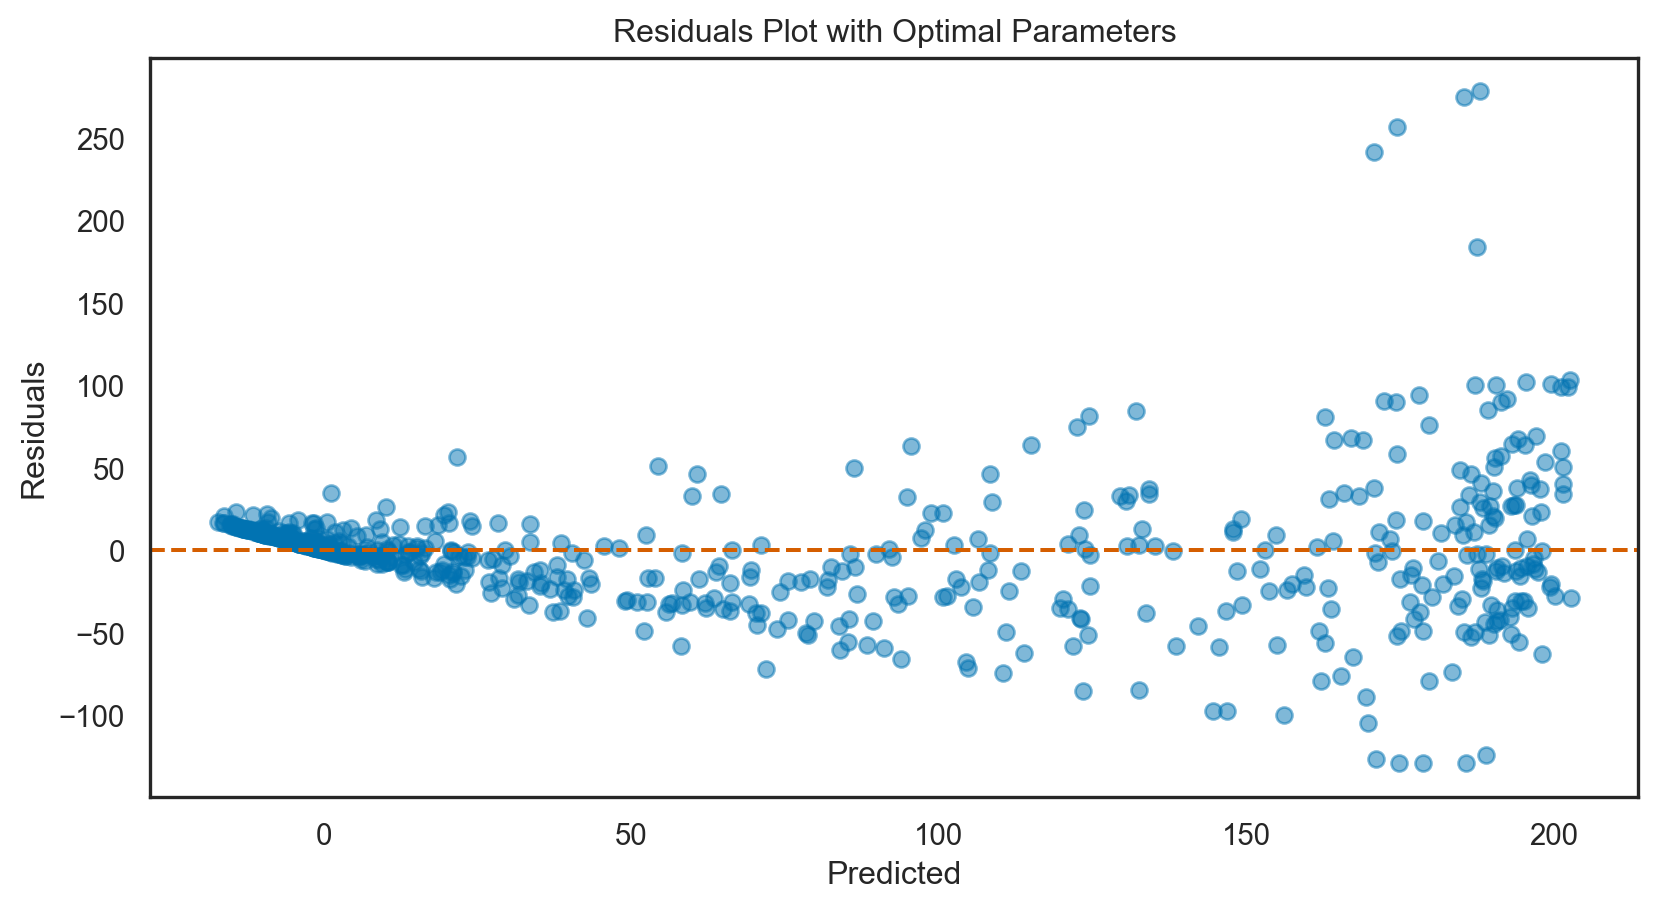

In [26]:
#| code-fold: true
residuals_best = y_test - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot with Optimal Parameters')
plt.show()

In [27]:
#| code-fold: true
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardizing the features
scaler = StandardScaler()

# PCA for dimensionality reduction
pca = PCA()

# Linear Regression
lin_reg = LinearRegression()

# Creating a pipeline for PCR
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('lin_reg', lin_reg)])

# Fit the PCR model
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R-squared: {round(r2, 4)}')

Mean Squared Error: 1526.64
R-squared: 0.8002


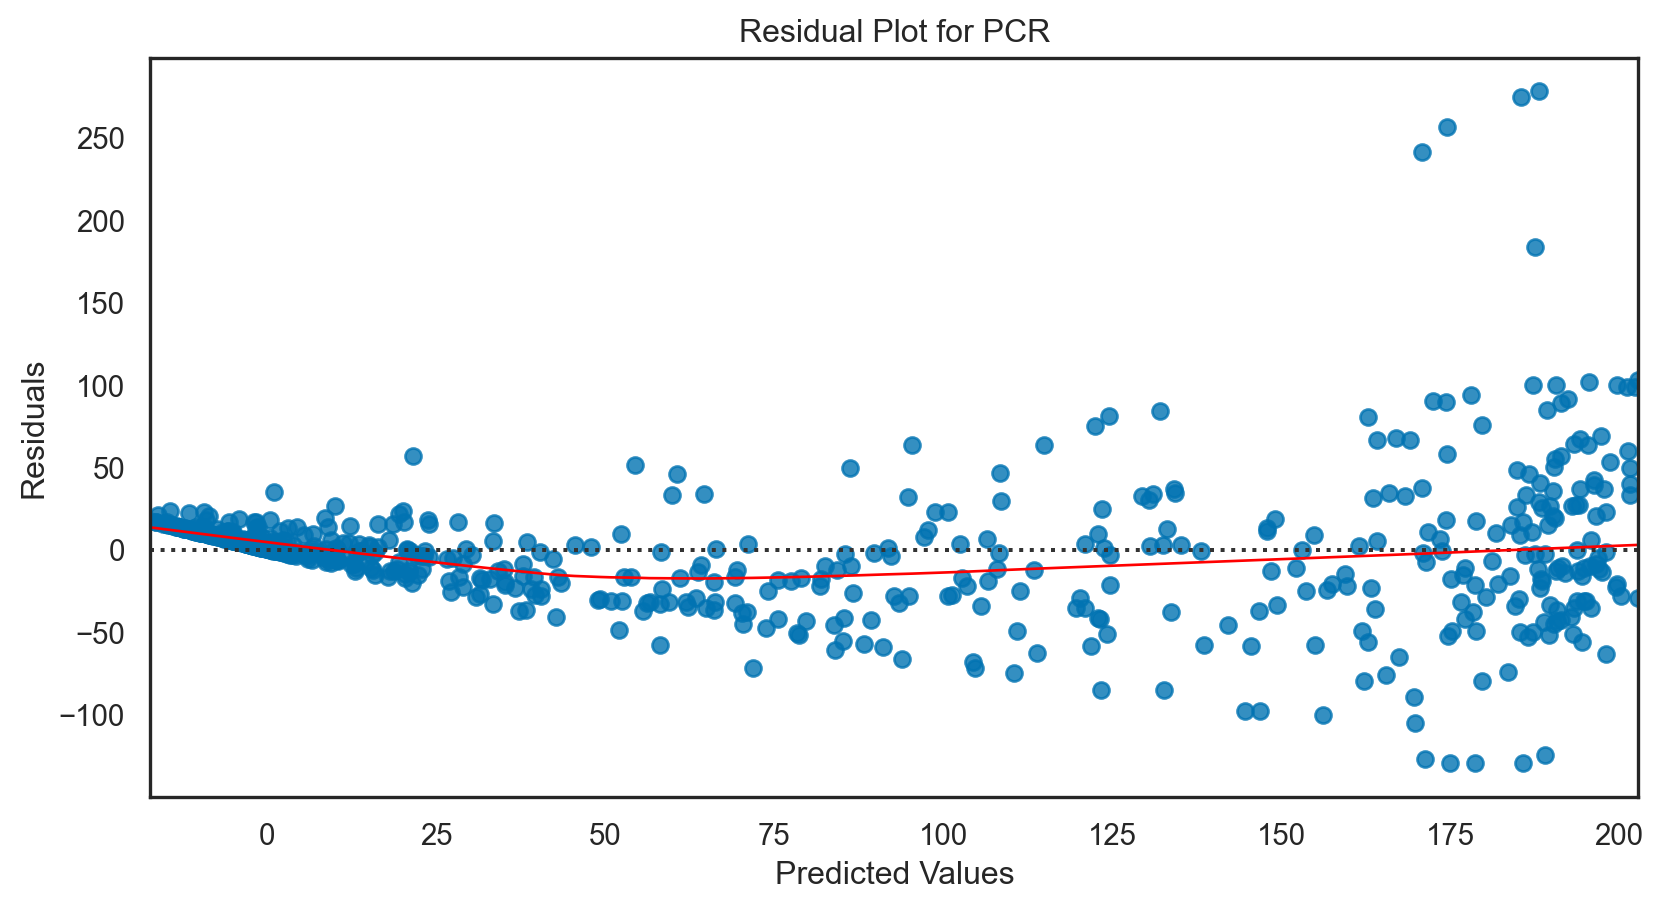

In [28]:
#| code-fold: true
residuals = y_test - y_pred
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for PCR')
plt.show()

In [29]:
#| code-fold: true
# Function to calculate MSE with cross-validation
def cv_mse(n_components):
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('pca', PCA(n_components = n_components)), 
        ('lin_reg', LinearRegression())
    ])
    mse = -cross_val_score(pipeline, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5).mean()
    return mse

# Testing different numbers of components
components_range = range(1, min(len(X_train.columns), len(X_train)) + 1)
mse_scores = [cv_mse(n) for n in components_range]

# Find the optimal number of components
optimal_components = components_range[np.argmin(mse_scores)]
print(f'Optimal number of components: {optimal_components}')

# Re-fit the PCR model with the optimal number of components
pipeline.set_params(pca__n_components = optimal_components)
pipeline.fit(X_train, y_train)

# New predictions and evaluation
y_pred_opt = pipeline.predict(X_test)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt)

print(f'Optimized Mean Squared Error: {round(mse_opt, 2)}')
print(f'Optimized R-squared: {round(r2_opt, 4)}')

Optimal number of components: 4
Optimized Mean Squared Error: 1526.64
Optimized R-squared: 0.8002


In [30]:
# Comparing initial and optimized model performances
print(f'Initial vs. Optimized MSE: {round(mse, 2)} vs. {round(mse_opt, 2)}')
print(f'Initial vs. Optimized R-squared: {round(r2, 4)} vs. {round(r2_opt, 4)}')

Initial vs. Optimized MSE: 1526.64 vs. 1526.64
Initial vs. Optimized R-squared: 0.8002 vs. 0.8002


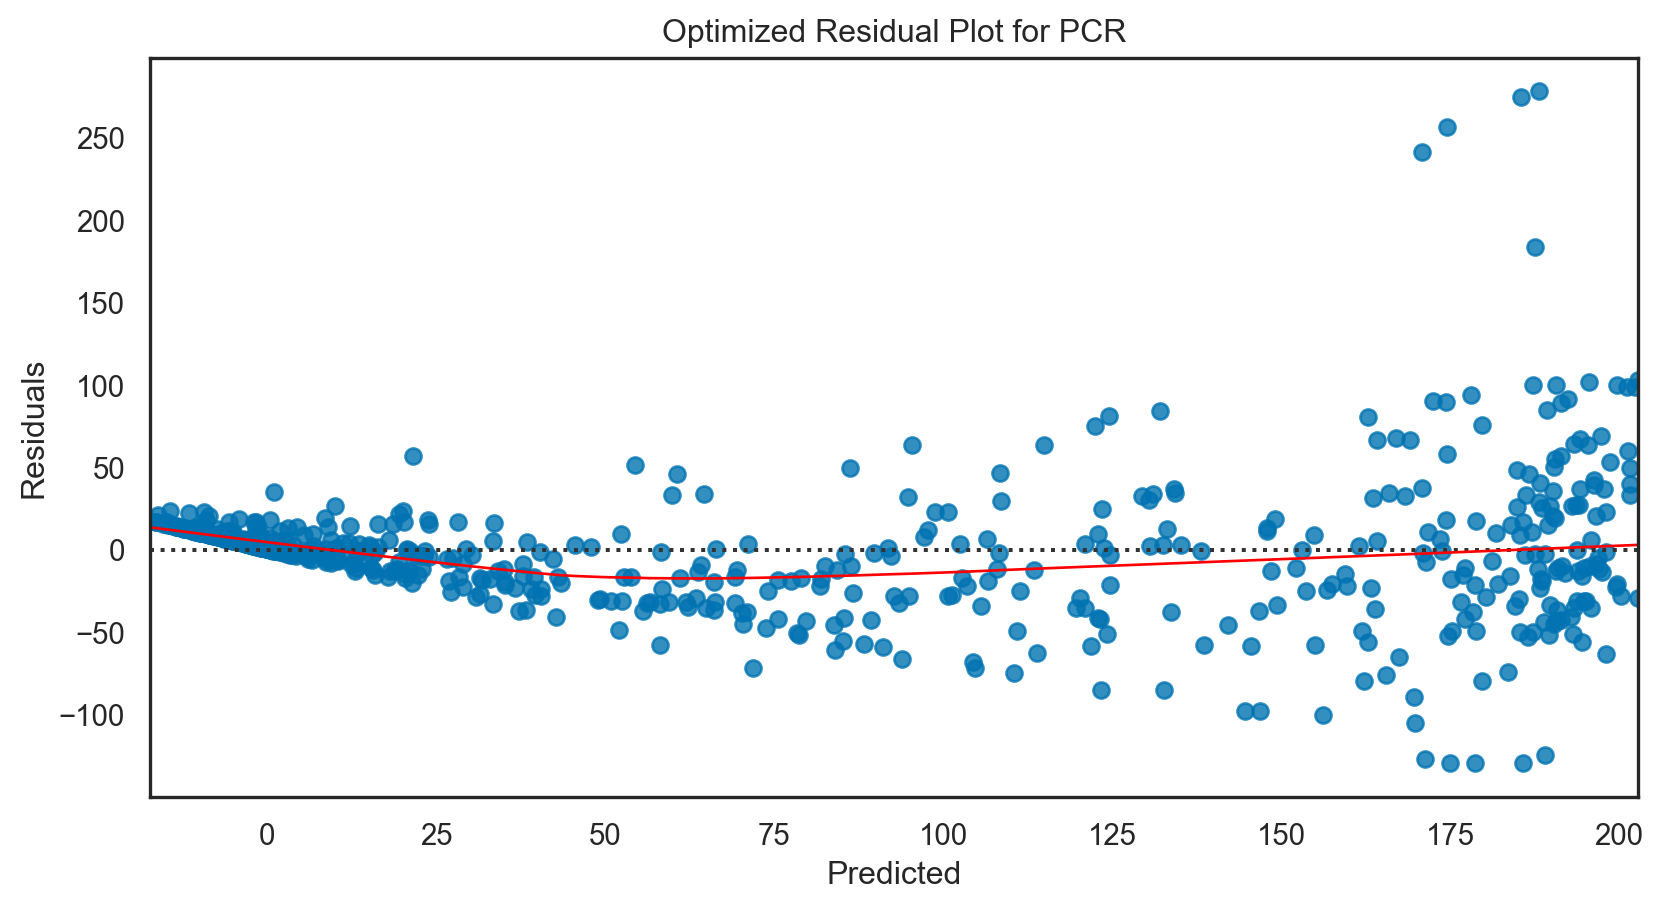

In [31]:
#| code-fold: true
residuals_opt = y_test - y_pred_opt
sns.residplot(x = y_pred_opt, y = residuals_opt, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Optimized Residual Plot for PCR')
plt.show()

In [32]:
#| code-fold: true
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize PLS Regression model
pls = PLSRegression(n_components = 2)  # Adjust n_components as needed

# Fit the model
pls.fit(X_train, y_train)

# Predict on the testing set
y_pred = pls.predict(X_test)

# Calculate and print the MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred.flatten())  # Flatten if y_pred is 2D

print(f'Mean Squared Error: {round(mse, 2)}')
print(f'R-squared: {round(r2, 4)}')

Mean Squared Error: 1534.9
R-squared: 0.7991


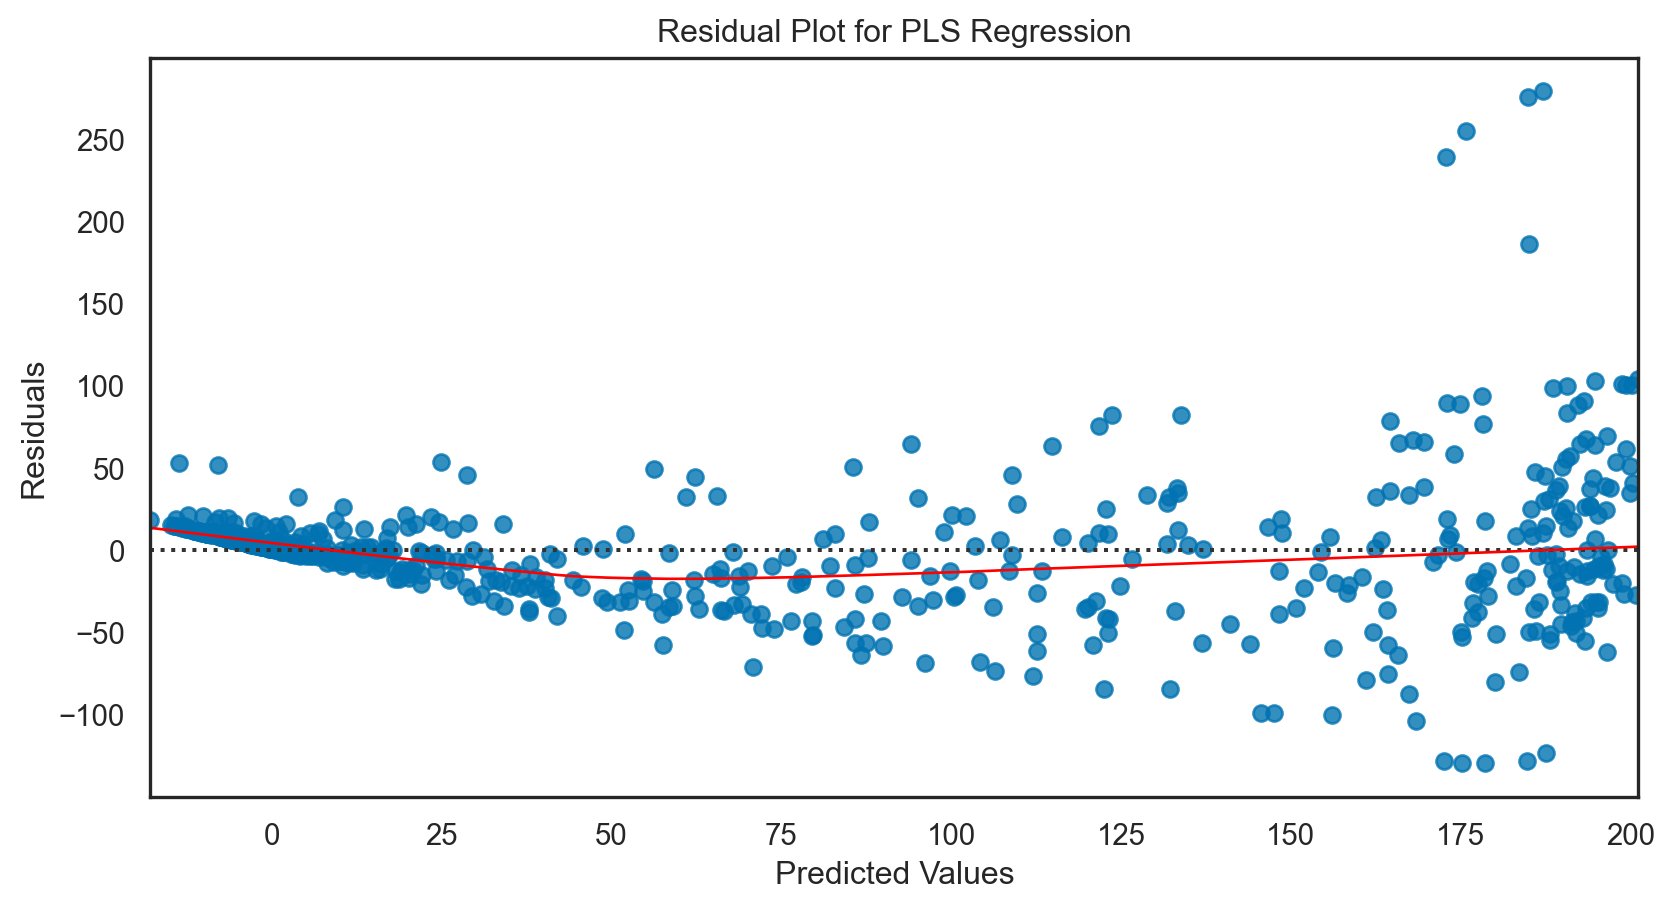

In [33]:
#| code-fold: true
residuals = y_test - y_pred.flatten()
sns.residplot(x = y_pred.flatten(), y = residuals, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for PLS Regression')
plt.show()

In [34]:
#| code-fold: true
# Function to perform cross-validation and calculate MSE
def cv_mse_pls(n_components):
    pls = PLSRegression(n_components = n_components)
    mse = -cross_val_score(pls, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return mse

# Determining the optimal number of components
components_range = range(1, min(len(X_train.columns), len(X_train)) + 1)
mse_scores = [cv_mse_pls(n) for n in components_range]

# Optimal number of components
optimal_components = components_range[np.argmin(mse_scores)]
print(f'Optimal number of components: {optimal_components}')

# Re-fit PLS model with the optimal number of components
pls.set_params(n_components = optimal_components)
pls.fit(X_train, y_train)

# New predictions and evaluation
y_pred_opt = pls.predict(X_test)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt = r2_score(y_test, y_pred_opt.flatten())

print(f'Optimized Mean Squared Error: {round(mse_opt, 2)}')
print(f'Optimized R-squared: {round(r2_opt, 4)}')

Optimal number of components: 3
Optimized Mean Squared Error: 1526.57
Optimized R-squared: 0.8002


In [35]:
# Comparing initial and optimized model performances
print(f'Initial vs. Optimized MSE: {round(mse, 2)} vs. {round(mse_opt, 2)}')
print(f'Initial vs. Optimized R-squared: {round(r2, 4)} vs. {round(r2_opt, 4)}')

Initial vs. Optimized MSE: 1534.9 vs. 1526.57
Initial vs. Optimized R-squared: 0.7991 vs. 0.8002


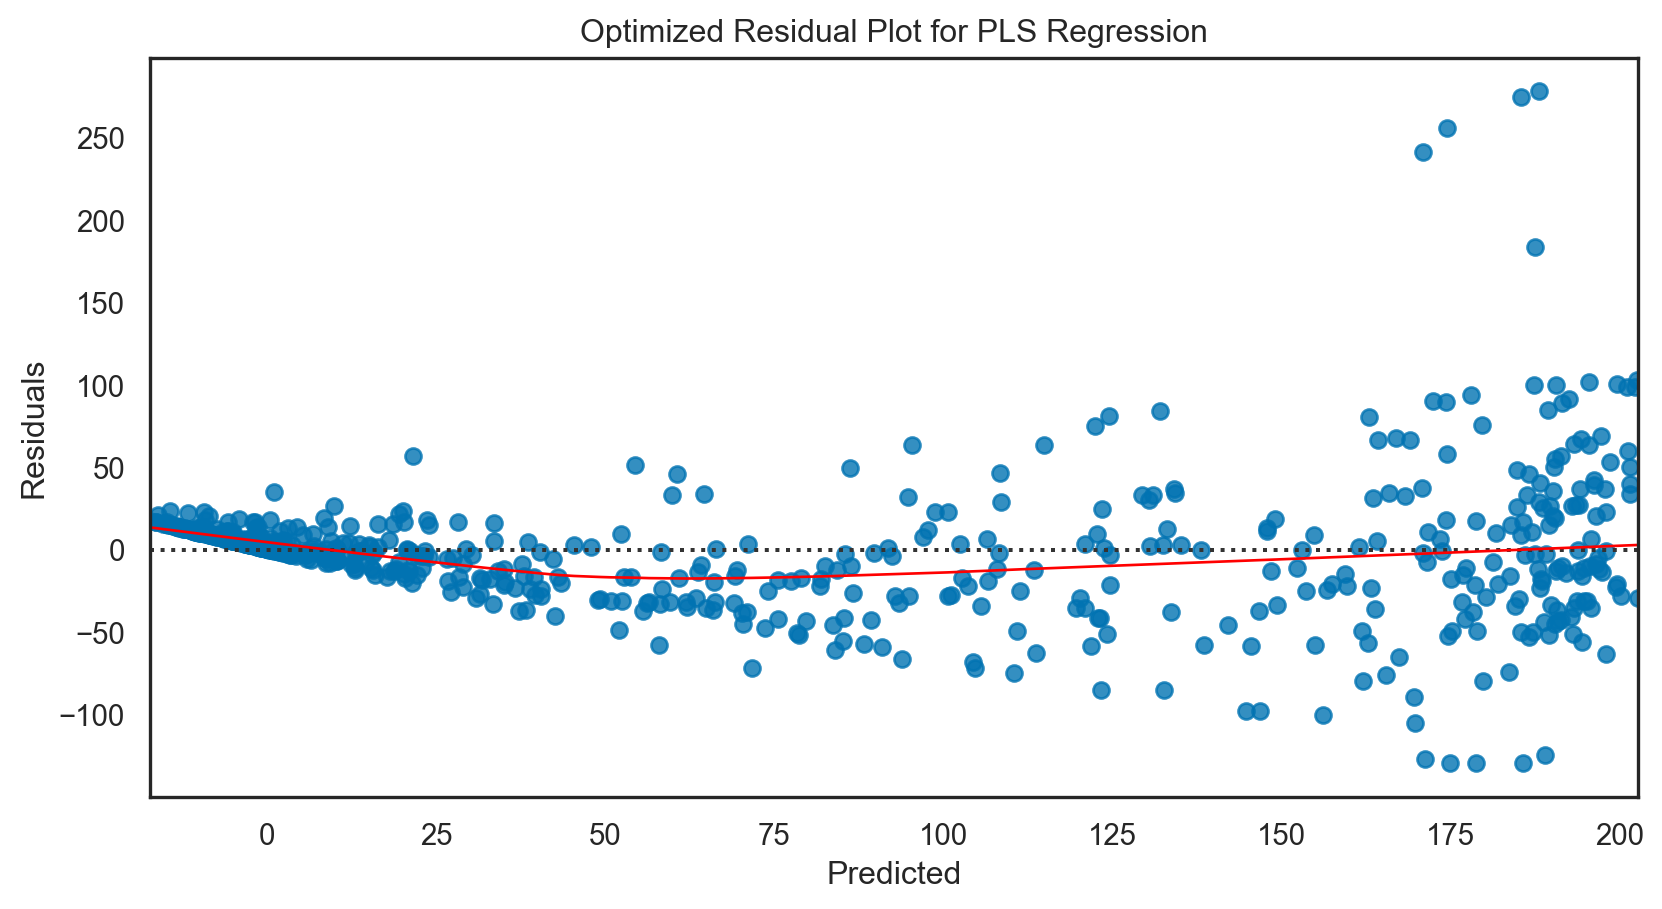

In [36]:
#| code-fold: true
residuals_opt = y_test - y_pred_opt.flatten()
sns.residplot(x = y_pred_opt.flatten(), y = residuals_opt, lowess = True, line_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Optimized Residual Plot for PLS Regression')
plt.show()